1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


integral of histo: 94.5
sum of gaussians: 98.99999950069783


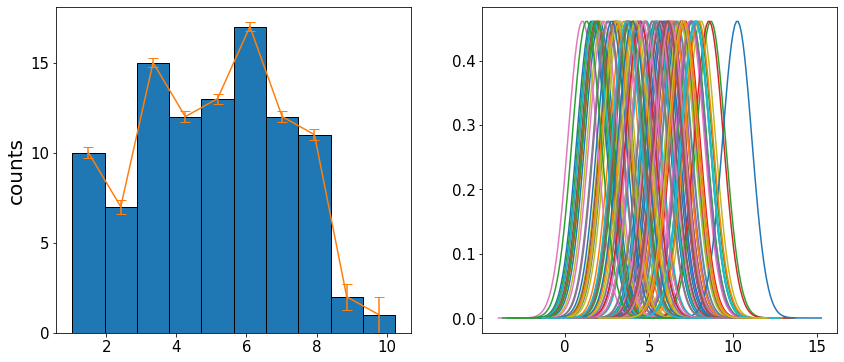

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import numpy as np
import numpy.random as npr
from scipy.stats import norm
import math



#first point
mu, sigma = 5, 2
x = np.random.normal(mu, sigma, 100)
#print(x)

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

#second point
histo,bin_edges,g = ax1.hist(x=x, bins = 10, ec="black")

ax1.set_ylabel('counts', fontsize='20') 
ax1.tick_params(axis='both', which='major', labelsize=15)
maxim=histo.max()+5
ax1.set_yticks(np.arange(0,maxim,5))
 

bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
err=[]
for i in histo:
    err.append(1/((i)**0.5))
width=0
ax1.errorbar(bin_centres, histo, yerr=err, capsize=5)

#integrale
area=np.trapz(histo, np.arange(0,10))
print("integral of histo:",area)

#third point
from scipy.stats import norm

devst=1.06*np.std(x)*(len(x))**(-1/5)
somma = 0

for i in x:
    y = np.linspace(i-mu,i+mu,100)
    g_y = norm.pdf(y,loc=i,scale=devst)
    ax2.plot(y, g_y)
    somma += np.sum(g_y)

ax2.tick_params(axis='both', which='major', labelsize=15) 

somma = somma/10       #resta da capire questoooooooooooo 
print("sum of gaussians:",somma)

plt.show()


2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2021-12-06 12:44:21--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6022:18::a27d:4212
Connessione a www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2021-12-06 12:44:21--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucda0d66cc5f61c803df9c87d98e.dl.dropboxusercontent.com/cd/0/inline/BbVVFHXg0fpBZmr_Y_4wCfkfDYMrRw1DCC-eFhQmmHOEgHIlgf7kIbxoE27G5F1k93EmBkMqusGYEaScBHVW1-6en98n1Pd8MhwYkgfeAT3hPmrRradxP4rYBzQXyKa7QpEZn5_xNlqNXXfPt_TVqa4z/file# [segue]
--2021-12-06 12:44:21--  https://ucda0d66cc5f61c803df9c87d98e.dl.dropboxusercontent.com/cd/0/inline/BbVV

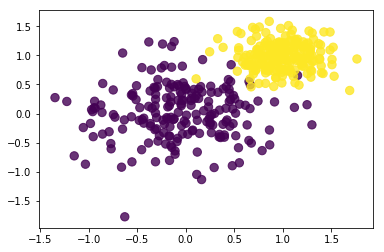

In [3]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

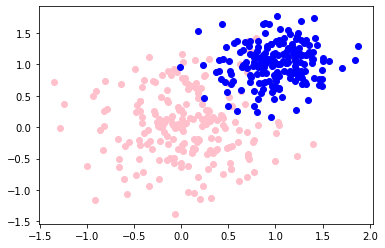

In [4]:
#exercise 2
def TDdataset(mean1,std1,mean2,std2):
    #first category
    x1 = np.random.normal(mean1, std1, 200)
    y1 = np.random.normal(mean1, std1, 200)
    #second category
    x2 = np.random.normal(mean2, std2, 200)
    y2 = np.random.normal(mean2, std2, 200)
    
    plt.scatter(x1,y1,c='pink')
    plt.scatter(x2,y2,c='blue')
    
TDdataset(0,0.5,1,0.3)    
    

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [24]:
#! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

    residuals  distances
0    1.100000       16.0
1   -1.950000        6.3
8   -0.042857        3.3
9    0.128571        5.3
10   0.085714       15.0
11  -0.130000        9.3
12  -0.090000       10.2
13   0.210000       12.2
14   0.170000        7.9
15   0.042857        4.5 

slope: 0.0032597701220305835 
intercept: -0.15432816763069473 
r_value: 0.043403510522559086 
p_value 8.717037183576464e-06 
std_err: 0.0007327014008445789


/home/valentina/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


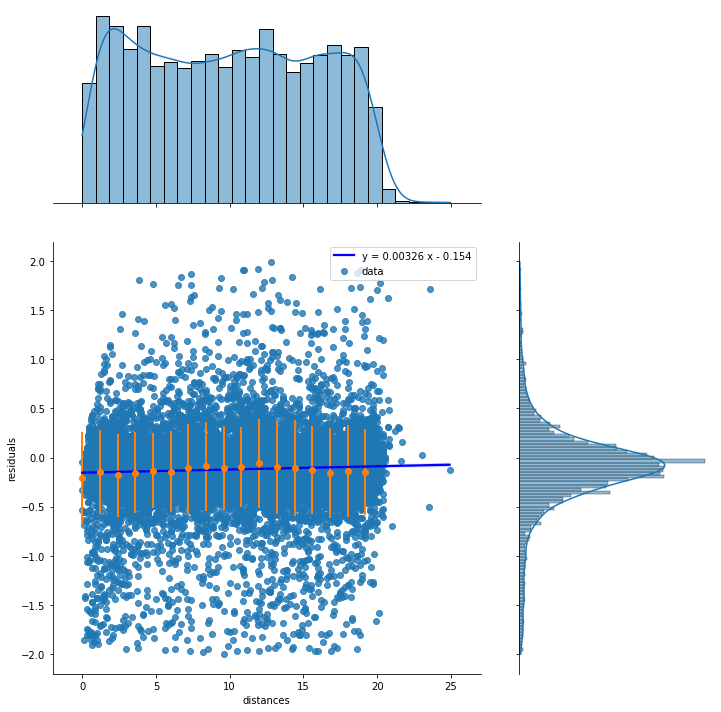

In [36]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

#first point
arr = np.load('residuals_261.npy', allow_pickle = True)
df = pd.DataFrame( data = arr.item(0))

#second point
#df

#third point
mask = abs(df['residuals']) < 2
df = df[mask]
print(df[:10],"\n")

#4-th point 
slope, intercept, r_value, p_value, std_err = stats.linregress(df['distances'],df['residuals'])
print("slope:",slope,"\nintercept:", intercept, "\nr_value:",r_value,"\np_value",  p_value, "\nstd_err:", std_err)


#5-th point
g = sns.jointplot("distances", "residuals", data=df, kind="reg",ratio=2,height=10,xlim=(-2,27),line_kws={"color": "blue",  "label":"regression" })

#6th-point
bins = 1.2
x = np.arange(0,20,bins)
y = []
differences=[]
erry=[]

for j in range(len(x)):
    
    maskj = np.logical_and(df['distances']>=j, df['distances']<=(j+bins)) 
    dfj = df[maskj] 
    
    if len(dfj)!= 0:
        y.append((dfj['residuals'].sum())/len(dfj))
    else:
         y.append(0)

    som2 = 0
    for i in dfj['residuals']:
        
        som2 = som2 + (i-y[j])**2

        
    if len(dfj)!=0:
            erry.append((som2/len(dfj))**0.5)
    else:
         erry.append(0)

#print(len(x),"\n mean res\n",len(y), "\n errors:\n", len(erry))
#plt.legend(labels=["y = -0.15 + x3.3e-3"])

g.ax_joint.errorbar(x,y,erry, c='tab:orange', fmt='o', ecolor='tab:orange',label='Error bars', elinewidth=2)
g.ax_joint.legend(['y = 0.00326 x - 0.154','data'], loc='best')
